<a href="https://colab.research.google.com/github/MuhammetCanGumussu/DL_Exercises/blob/main/CIFAR10_project_2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

Using cuda:0 device


In [ ]:
transform = torchvision.transforms.ToTensor()
target_transform = torchvision.transforms.Lambda( lambda y: torch.zeros(10, dtype= torch.float).scatter_(0, torch.tensor(y),value= 1) )

In [ ]:
train_dataset= torchvision.datasets.CIFAR10(
    root= "./CIFAR10",
    train= True,
    download= True,
    transform= transform,
    target_transform= target_transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10


In [ ]:
test_dataset= torchvision.datasets.CIFAR10(
    root="./CIFAR10",
    train= False,
    download= True,
    transform= transform,
    target_transform= target_transform)

Files already downloaded and verified


In [ ]:
#görüldüğü üzere transform işlemlerini vs dataloader değil, dataset halletmekte 
#(herhangi bir veri alındığında (dataloader ile veya direkt indexleme ile) o veri üzerinde çalışır)
#dataloader batch, shuffle işlemlerini uyguluyor

X,y = train_dataset[0]
print(f"x.dtype: {X.dtype}\ny.dtype: {y.dtype}")
print(f"x.shape: {X.shape}\ny.shape: {y.shape}")

x.dtype: torch.float32
y.dtype: torch.float32
x.shape: torch.Size([3, 32, 32])
y.shape: torch.Size([10])


In [ ]:
train_dataloader= torch.utils.data.DataLoader(train_dataset, batch_size= 64, shuffle= True, num_workers= 2)
test_dataloader= torch.utils.data.DataLoader(test_dataset, batch_size= 64, shuffle= True, num_workers= 2)

In [ ]:
img_train, label_train= next(iter(train_dataloader))

print(f"train image shape: {img_train.shape}")
print(f"train label shape: {label_train.shape}")
print(f"dtype of img_train: {img_train.dtype}")
print(f"dtype of label_train: {label_train.dtype}")  

train image shape: torch.Size([64, 3, 32, 32])
train label shape: torch.Size([64, 10])
dtype of img_train: torch.float32
dtype of label_train: torch.float32


In [ ]:
img_test, label_test= next(iter(test_dataloader))

print(f"test image shape: {img_test.shape}")
print(f"test label shape: {label_test.shape}")
print(f"dtype of img_train: {img_test.dtype}")
print(f"dtype of label_train: {label_test.dtype}")  

test image shape: torch.Size([64, 3, 32, 32])
test label shape: torch.Size([64, 10])
dtype of img_train: torch.float32
dtype of label_train: torch.float32


In [ ]:
print(f"number of samples in train_dataset: {len(train_dataset)}")
print("-----------------------------------")
print(f"minibatch size: {train_dataloader.batch_size}")
print(f"number of minibatch for completing 1 epoc: {len(train_dataloader)}")

number of samples in train_dataset: 50000
-----------------------------------
minibatch size: 64
number of minibatch for completing 1 epoc: 782


In [ ]:
print(f"number of samples in test_dataset: {len(test_dataset)}")
print("-----------------------------------")
print(f"minibatch size: {test_dataloader.batch_size}")
print(f"number of minibatch for completing 1 epoc: {len(test_dataloader)}")

number of samples in test_dataset: 10000
-----------------------------------
minibatch size: 64
number of minibatch for completing 1 epoc: 157


In [ ]:
labels_map= {
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
}

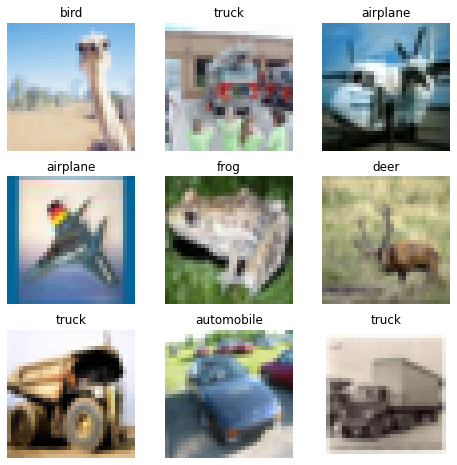

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[torch.argmax(label,dim= 0).item()])
    plt.axis("off")
    transform= torchvision.transforms.ToPILImage()
    img= transform(img)
    plt.imshow(img)
plt.show()

In [ ]:
# With Learnable Parameters
m = torch.nn.BatchNorm2d(100)
input = torch.randn(20, 100, 35, 45)
print(input[0][0])
print("-------------------\n\n")
output = m(input)
print(output[0][0])

tensor([[-1.0238, -0.5007,  1.9425,  ...,  1.2217, -0.7803,  1.7572],
        [ 2.1432, -0.3591,  1.3254,  ...,  0.3163,  0.0735,  1.2929],
        [ 0.9584,  0.7666, -0.0386,  ..., -0.1670, -1.2112, -0.9957],
        ...,
        [-0.0993,  0.0256, -0.1031,  ...,  0.7536, -1.0078, -0.4507],
        [-0.4135,  0.9317,  0.6460,  ..., -0.3463,  0.3527, -0.2497],
        [-2.0137, -1.2328, -2.1727,  ..., -1.0772, -0.5285,  1.6305]])
-------------------


tensor([[-1.0279, -0.5036,  1.9452,  ...,  1.2227, -0.7839,  1.7594],
        [ 2.1463, -0.3618,  1.3266,  ...,  0.3152,  0.0718,  1.2941],
        [ 0.9588,  0.7666, -0.0405,  ..., -0.1692, -1.2158, -0.9998],
        ...,
        [-0.1013,  0.0239, -0.1052,  ...,  0.7535, -1.0119, -0.4536],
        [-0.4162,  0.9321,  0.6457,  ..., -0.3490,  0.3517, -0.2521],
        [-2.0202, -1.2374, -2.1795,  ..., -1.0815, -0.5315,  1.6324]],
       grad_fn=<SelectBackward0>)


In [ ]:
deneme_tensor = torch.ones((3,32,32)).unsqueeze_(0)
deneme_sonuc = torch.nn.functional.max_pool2d(deneme_tensor, kernel_size = 3, stride = 2)
deneme_sonuc.shape

torch.Size([1, 3, 15, 15])

In [ ]:
#class CNN_WithDropOutReg (torch.nn.Module):
#  def __init__(self):
#    super(CNN_WithDropOutReg,self).__init__()
#    self.conv1 = torch.nn.Conv2d(in_channels= 3, out_channels= 16, kernel_size = 3, padding = "same")
#    self.batch1 = torch.nn.BatchNorm2d(16)
#    self.conv2 = torch.nn.Conv2d(in_channels= 16, out_channels= 32, kernel_size = 3, padding = "same")
#    self.batch2 = torch.nn.BatchNorm2d(32)
#    self.conv3 = torch.nn.Conv2d(in_channels= 32, out_channels= 64, kernel_size = 3, padding = "same")
#    self.batch3 = torch.nn.BatchNorm2d(64)
#    #self.conv4 = torch.nn.Conv2d(in_channels= 128, out_channels= 256, kernel_size = 3, padding = "same")
#    #self.batch4 = torch.nn.BatchNorm2d(256)
#
#    self.fc1 = torch.nn.Linear(64*20*20, 512) #16*16 image w & h
#    self.fc1_batch = torch.nn.BatchNorm1d(512)
#    self.fc2 = torch.nn.Linear(512, 128) 
#    self.fc2_batch = torch.nn.BatchNorm1d(128)
#    self.fc3 = torch.nn.Linear(128, 10) 
#  
#  def forward(self,x):
#    x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.batch1( self.conv1(x) ) ) , kernel_size = 5, stride = 1) #32x32 in, 28x28 out
#    x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.batch2( self.conv2(x) ) ) , kernel_size = 5, stride = 1) #28x28 in, 24x24 out 
#    x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.batch3( self.conv3(x) ) ), kernel_size = 5, stride = 1) #24x24 in, 20x20 out
#    #x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.conv4(x) ) , kernel_size = 5, stride = 1) #20x20 in, 16x16 out
#    x = x.view(-1, self.num_flat_features(x))
#    
#    x = torch.nn.functional.relu( self.fc1_batch( self.fc1(x) ) )
#    x = torch.nn.functional.relu( self.fc2_batch( self.fc2(x) ) )
#    logits = self.fc3(x)
#    return logits
#
#
#  def num_flat_features(self, x): #nice
#        size = x.size()[1:]  # all dimensions except the batch dimension
#        num_features = 1
#        for s in size:
#            num_features *= s
#        return num_features
#    
#

In [ ]:
class CNN_WithBatch (torch.nn.Module):
  def __init__(self):
    super(CNN_WithBatch,self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels= 3, out_channels= 16, kernel_size = 3, padding = "same")
    self.batch1 = torch.nn.BatchNorm2d(16)
    self.conv2 = torch.nn.Conv2d(in_channels= 16, out_channels= 32, kernel_size = 3, padding = "same")
    self.batch2 = torch.nn.BatchNorm2d(32)
    self.conv3 = torch.nn.Conv2d(in_channels= 32, out_channels= 64, kernel_size = 3, padding = "same")
    self.batch3 = torch.nn.BatchNorm2d(64)
    #self.conv4 = torch.nn.Conv2d(in_channels= 128, out_channels= 256, kernel_size = 3, padding = "same")
    #self.batch4 = torch.nn.BatchNorm2d(256)

    self.fc1 = torch.nn.Linear(64*20*20, 512) #16*16 image w & h
    self.fc1_batch = torch.nn.BatchNorm1d(512)
    self.fc2 = torch.nn.Linear(512, 128) 
    self.fc2_batch = torch.nn.BatchNorm1d(128)
    self.fc3 = torch.nn.Linear(128, 10) 
  
  def forward(self,x):
    x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.batch1( self.conv1(x) ) ) , kernel_size = 5, stride = 1) #32x32 in, 28x28 out
    x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.batch2( self.conv2(x) ) ) , kernel_size = 5, stride = 1) #28x28 in, 24x24 out 
    x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.batch3( self.conv3(x) ) ), kernel_size = 5, stride = 1) #24x24 in, 20x20 out
    #x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.conv4(x) ) , kernel_size = 5, stride = 1) #20x20 in, 16x16 out
    x = x.view(-1, self.num_flat_features(x))
    
    x = torch.nn.functional.relu( self.fc1_batch( self.fc1(x) ) )
    x = torch.nn.functional.relu( self.fc2_batch( self.fc2(x) ) )
    logits = self.fc3(x)
    return logits


  def num_flat_features(self, x): #nice
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    


In [ ]:
class CNN (torch.nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    
    self.conv1 = torch.nn.Conv2d(in_channels= 3, out_channels= 16, kernel_size = 3, padding = "same")
    self.conv2 = torch.nn.Conv2d(in_channels= 16, out_channels= 32, kernel_size = 3, padding = "same")
    self.conv3 = torch.nn.Conv2d(in_channels= 32, out_channels= 64, kernel_size = 3, padding = "same")
    #self.conv4 = torch.nn.Conv2d(in_channels= 128, out_channels= 256, kernel_size = 3, padding = "same")

    self.fc1 = torch.nn.Linear(64*20*20, 512) #16*16 image w & h
    self.fc2 = torch.nn.Linear(512, 128) 
    self.fc3 = torch.nn.Linear(128, 10) 
  
  def forward(self,x):
    x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.conv1(x) ) , kernel_size = 5, stride = 1) #32x32 in, 28x28 out
    x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.conv2(x) ) , kernel_size = 5, stride = 1) #28x28 in, 24x24 out 
    x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.conv3(x) ) , kernel_size = 5, stride = 1) #24x24 in, 20x20 out
    #x = torch.nn.functional.max_pool2d( torch.nn.functional.relu( self.conv4(x) ) , kernel_size = 5, stride = 1) #20x20 in, 16x16 out
    x = x.view(-1, self.num_flat_features(x))
    
    x = torch.nn.functional.relu( self.fc1(x) )  #!!!!!!!!!!!!!!! AKTİVASYON FONKSİYONU KOYMAYI UNUTMUŞUM :d  /koydum
    x = torch.nn.functional.relu( self.fc2(x) )
    logits = torch.nn.functional.relu( self.fc3(x) )
    return logits


  def num_flat_features(self, x): #nice
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    


In [ ]:
model = CNN_WithBatch()
model = model.to(device)

In [ ]:
#model = CNN()
#model = model.to(device)

In [ ]:
deneme_tensor = torch.ones((2,3,32,32)).to(device) #batch1d bath size'in 1 den fazla olmasını istediğinden bu denemede batch dim=2 yaptık
print(deneme_tensor.device)
print(deneme_tensor.shape)

cuda:0
torch.Size([2, 3, 32, 32])


In [ ]:
deneme_logits = model(deneme_tensor)
print(deneme_logits)

tensor([[-0.0874, -0.0338, -0.0348, -0.0234,  0.0392, -0.0615, -0.0544, -0.0674,
         -0.0454, -0.0823],
        [-0.0874, -0.0338, -0.0348, -0.0234,  0.0392, -0.0615, -0.0544, -0.0674,
         -0.0454, -0.0823]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
#deneme_logits = model(deneme_tensor)
#print(deneme_logits)

tensor([[0.0526, 0.0000, 0.0756, 0.0438, 0.0387, 0.0000, 0.0082, 0.0810, 0.0000,
         0.0668]], device='cuda:0', grad_fn=<ReluBackward0>)


In [ ]:
num_params = sum(param.numel() for param in model.parameters())  #numel : number of elements
print(f"number of model parameters: {num_params:,}") #formatlamaya dikkat et, baya kullanışlı

number of model parameters: 13,199,754


In [ ]:
print(f"Model structure: {model}\n\n")

Model structure: CNN_WithBatch(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (batch1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (batch2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=25600, out_features=512, bias=True)
  (fc1_batch): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc2_batch): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)




In [ ]:
learning_rate= 1e-3
momentum= 0.9
epochs=10

In [ ]:
loss_fn= torch.nn.CrossEntropyLoss()
#optimizer= torch.optim.SGD(params= model.parameters(), lr= learning_rate, momentum= momentum) #without regularization
optimizer= torch.optim.SGD(params= model.parameters(), lr= learning_rate, momentum= momentum, weight_decay= 0.05) #weight_decay l2 regularizasyonu implemente etmektedir,
                                                                                                      #l1 regularizasyonu yapmak istersen kendin eğitim loop'unda implemente edebilirsin

In [ ]:
def trainLoop(train_dataloader, loss_fn, model, optimizer):
  
  size= len(train_dataloader.dataset)
  
  for batch, (X,y) in enumerate(train_dataloader):
    
    X = X.to(device)
    y = y.to(device)
    pred= model(X)
    loss= loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current= loss.item(), batch * len(X)
      print(f"loss: {loss:>2f}  [{current:>5d}/{size:>5d}]")


def testLoop(test_dataloader, loss_fn, model):

    size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_dataloader:

            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()  #do not forget!, our prediction has batch dim

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


def printTrainAcc(train_dataloader, loss_fn, model):   #testLoop ile aynı, train acc basmak için klonladım
    size = len(train_dataloader.dataset)
    num_batches = len(train_dataloader)
    train_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in train_dataloader:

            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            train_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()  #do not forget!, our prediction has batch dim

    train_loss /= num_batches
    correct /= size
    print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")
  

In [ ]:
#Batch norm'suz CNN + FC katmanlarında nonlinear aktivasyon fonksiyonlarını koymayı unutuşum
for t in range(epochs):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
    printTrainAcc(train_dataloader, loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 2.298343  [    0/50000]
loss: 2.296155  [ 6400/50000]
loss: 2.293505  [12800/50000]
loss: 2.299696  [19200/50000]
loss: 2.277828  [25600/50000]
loss: 2.269437  [32000/50000]
loss: 2.208136  [38400/50000]
loss: 2.154610  [44800/50000]
Test Error: 
 Accuracy: 20.2%, Avg loss: 2.148827 

Epoch 2

-------------------------------
loss: 2.114754  [    0/50000]
loss: 1.935253  [ 6400/50000]
loss: 1.983961  [12800/50000]
loss: 2.002239  [19200/50000]
loss: 1.939833  [25600/50000]
loss: 1.763998  [32000/50000]
loss: 1.773810  [38400/50000]
loss: 1.676661  [44800/50000]
Test Error: 
 Accuracy: 37.6%, Avg loss: 1.706139 

Epoch 3

-------------------------------
loss: 1.697735  [    0/50000]
loss: 1.567112  [ 6400/50000]
loss: 1.734975  [12800/50000]
loss: 1.540327  [19200/50000]
loss: 1.635022  [25600/50000]
loss: 1.515105  [32000/50000]
loss: 1.663217  [38400/50000]
loss: 1.487486  [44800/50000]
Test Error: 
 Accuracy: 43.7%, Avg loss: 1.549037 

E

In [ ]:
#Batch norm'suz CNN + fc katmanlarında aktivasyon fonklarını koydum 
for t in range(epochs):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
    printTrainAcc(train_dataloader, loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 2.297454  [    0/50000]
loss: 2.295168  [ 6400/50000]
loss: 2.296876  [12800/50000]
loss: 2.302001  [19200/50000]
loss: 2.301964  [25600/50000]
loss: 2.295620  [32000/50000]
loss: 2.290565  [38400/50000]
loss: 2.285239  [44800/50000]
Test Error: 
 Accuracy: 19.1%, Avg loss: 2.277581 

Epoch 2

-------------------------------
loss: 2.291604  [    0/50000]
loss: 2.237769  [ 6400/50000]
loss: 2.257456  [12800/50000]
loss: 2.210524  [19200/50000]
loss: 2.094947  [25600/50000]
loss: 2.190742  [32000/50000]
loss: 2.080502  [38400/50000]
loss: 2.059969  [44800/50000]
Test Error: 
 Accuracy: 24.6%, Avg loss: 2.094201 

Epoch 3

-------------------------------
loss: 1.989141  [    0/50000]
loss: 1.892060  [ 6400/50000]
loss: 2.100076  [12800/50000]
loss: 1.992883  [19200/50000]
loss: 2.110482  [25600/50000]
loss: 1.992553  [32000/50000]
loss: 2.000209  [38400/50000]
loss: 1.987401  [44800/50000]
Test Error: 
 Accuracy: 34.8%, Avg loss: 1.931498 

E

In [ ]:
#Batch norm'suz CNN + fc katmanlarında aktivasyon fonklarını koydum 
for t in range(epochs):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
    printTrainAcc(train_dataloader, loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 0.686745  [    0/50000]
loss: 0.947033  [ 6400/50000]
loss: 0.852339  [12800/50000]
loss: 0.856620  [19200/50000]
loss: 0.713045  [25600/50000]
loss: 0.806238  [32000/50000]
loss: 0.934001  [38400/50000]
loss: 0.977344  [44800/50000]
Test Error: 
 Accuracy: 65.0%, Avg loss: 1.005036 

Epoch 2

-------------------------------
loss: 0.552551  [    0/50000]
loss: 0.766598  [ 6400/50000]
loss: 0.769765  [12800/50000]
loss: 0.704233  [19200/50000]
loss: 0.926176  [25600/50000]
loss: 0.901143  [32000/50000]
loss: 0.805000  [38400/50000]
loss: 0.566065  [44800/50000]
Test Error: 
 Accuracy: 72.0%, Avg loss: 0.830912 

Epoch 3

-------------------------------
loss: 0.646073  [    0/50000]
loss: 0.603160  [ 6400/50000]
loss: 0.590176  [12800/50000]
loss: 0.549637  [19200/50000]
loss: 0.536616  [25600/50000]
loss: 0.852316  [32000/50000]
loss: 0.575606  [38400/50000]
loss: 0.586809  [44800/50000]
Test Error: 
 Accuracy: 72.7%, Avg loss: 0.810852 

E

In [ ]:
#Batch norm CNN 
for t in range(epochs):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
    printTrainAcc(train_dataloader, loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 2.446681  [    0/50000]
loss: 1.299777  [ 6400/50000]
loss: 1.159502  [12800/50000]
loss: 1.146847  [19200/50000]
loss: 1.172080  [25600/50000]
loss: 0.790977  [32000/50000]
loss: 0.959629  [38400/50000]
loss: 0.985612  [44800/50000]
Test Error: 
 Accuracy: 66.9%, Avg loss: 0.966602 

Epoch 2

-------------------------------
loss: 0.831869  [    0/50000]
loss: 1.095493  [ 6400/50000]
loss: 0.707984  [12800/50000]
loss: 0.991915  [19200/50000]
loss: 0.870783  [25600/50000]
loss: 0.869704  [32000/50000]
loss: 0.669116  [38400/50000]
loss: 0.906192  [44800/50000]
Test Error: 
 Accuracy: 71.0%, Avg loss: 0.831600 

Epoch 3

-------------------------------
loss: 0.732804  [    0/50000]
loss: 0.543753  [ 6400/50000]
loss: 0.680152  [12800/50000]
loss: 0.705659  [19200/50000]
loss: 0.511912  [25600/50000]
loss: 0.698286  [32000/50000]
loss: 0.862818  [38400/50000]
loss: 0.837384  [44800/50000]
Test Error: 
 Accuracy: 72.9%, Avg loss: 0.773964 

E

In [ ]:
#Batch norm CNN 
for t in range(epochs):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
    printTrainAcc(train_dataloader, loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 0.040568  [    0/50000]
loss: 0.020120  [ 6400/50000]
loss: 0.014487  [12800/50000]
loss: 0.027940  [19200/50000]
loss: 0.012418  [25600/50000]
loss: 0.018772  [32000/50000]
loss: 0.047867  [38400/50000]
loss: 0.015570  [44800/50000]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.984746 

Epoch 2

-------------------------------
loss: 0.016548  [    0/50000]
loss: 0.002628  [ 6400/50000]
loss: 0.004698  [12800/50000]
loss: 0.010200  [19200/50000]
loss: 0.044209  [25600/50000]
loss: 0.005935  [32000/50000]
loss: 0.011358  [38400/50000]
loss: 0.027312  [44800/50000]
Test Error: 
 Accuracy: 77.1%, Avg loss: 0.940492 

Epoch 3

-------------------------------
loss: 0.008238  [    0/50000]
loss: 0.010964  [ 6400/50000]
loss: 0.006033  [12800/50000]
loss: 0.022964  [19200/50000]
loss: 0.023862  [25600/50000]
loss: 0.008608  [32000/50000]
loss: 0.006869  [38400/50000]
loss: 0.016983  [44800/50000]
Test Error: 
 Accuracy: 76.3%, Avg loss: 0.973474 

E

In [ ]:
printTrainAcc(train_dataloader, loss_fn, model)

2.468255789251998
49988.0
Train Error: 
 Accuracy: 100.0%, Avg loss: 0.003156 



In [ ]:
#Batch norm CNN + regularization (weight decay/l2 0.005)
for t in range(epochs):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
    printTrainAcc(train_dataloader, loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 2.386080  [    0/50000]
loss: 1.517540  [ 6400/50000]
loss: 1.228540  [12800/50000]
loss: 1.270629  [19200/50000]
loss: 1.196787  [25600/50000]
loss: 1.056655  [32000/50000]
loss: 1.008514  [38400/50000]
loss: 1.228284  [44800/50000]
Test Error: 
 Accuracy: 65.5%, Avg loss: 1.013498 

Train Error: 
 Accuracy: 68.0%, Avg loss: 0.953015 

Epoch 2

-------------------------------
loss: 0.926605  [    0/50000]
loss: 0.868333  [ 6400/50000]
loss: 0.721023  [12800/50000]
loss: 0.882345  [19200/50000]
loss: 0.951097  [25600/50000]
loss: 0.812173  [32000/50000]
loss: 0.905945  [38400/50000]
loss: 0.851769  [44800/50000]
Test Error: 
 Accuracy: 69.0%, Avg loss: 0.893786 

Train Error: 
 Accuracy: 74.5%, Avg loss: 0.770857 

Epoch 3

-------------------------------
loss: 0.605159  [    0/50000]
loss: 0.829150  [ 6400/50000]
loss: 0.668463  [12800/50000]
loss: 0.836089  [19200/50000]
loss: 0.644744  [25600/50000]
loss: 0.812361  [32000/50000]
loss: 0

In [ ]:
#Batch norm CNN + regularization (weight decay/l2 0.05)  //weight decay'i 10x arttırdım
for t in range(epochs):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
    printTrainAcc(train_dataloader, loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 0.069838  [    0/50000]
loss: 0.121765  [ 6400/50000]
loss: 0.120909  [12800/50000]
loss: 0.105180  [19200/50000]
loss: 0.172434  [25600/50000]
loss: 0.212555  [32000/50000]
loss: 0.235391  [38400/50000]
loss: 0.252100  [44800/50000]
Test Error: 
 Accuracy: 74.0%, Avg loss: 0.816220 

Train Error: 
 Accuracy: 95.9%, Avg loss: 0.306909 

Epoch 2

-------------------------------
loss: 0.338608  [    0/50000]
loss: 0.276365  [ 6400/50000]
loss: 0.372199  [12800/50000]
loss: 0.454215  [19200/50000]
loss: 0.462081  [25600/50000]
loss: 0.576586  [32000/50000]
loss: 0.647121  [38400/50000]
loss: 0.633881  [44800/50000]
Test Error: 
 Accuracy: 74.2%, Avg loss: 0.868193 

Train Error: 
 Accuracy: 90.6%, Avg loss: 0.532848 

Epoch 3

-------------------------------
loss: 0.539912  [    0/50000]
loss: 0.649791  [ 6400/50000]
loss: 0.587824  [12800/50000]
loss: 0.572027  [19200/50000]
loss: 0.692818  [25600/50000]
loss: 0.803321  [32000/50000]
loss: 0

In [ ]:
#Batch norm CNN + regularization (weight decay/l2 0.05)  //weight decay'i 10x arttırdım
for t in range(epochs):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
    printTrainAcc(train_dataloader, loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 0.767366  [    0/50000]
loss: 0.846304  [ 6400/50000]
loss: 0.916361  [12800/50000]
loss: 0.729679  [19200/50000]
loss: 0.685795  [25600/50000]
loss: 0.793276  [32000/50000]
loss: 0.713155  [38400/50000]
loss: 0.872673  [44800/50000]
Test Error: 
 Accuracy: 75.9%, Avg loss: 0.894015 

Train Error: 
 Accuracy: 82.7%, Avg loss: 0.766890 

Epoch 2

-------------------------------
loss: 0.638542  [    0/50000]
loss: 0.927132  [ 6400/50000]
loss: 0.933081  [12800/50000]
loss: 0.850018  [19200/50000]
loss: 0.713204  [25600/50000]
loss: 0.678187  [32000/50000]
loss: 0.836323  [38400/50000]
loss: 0.786411  [44800/50000]
Test Error: 
 Accuracy: 76.1%, Avg loss: 0.880641 

Train Error: 
 Accuracy: 82.0%, Avg loss: 0.764054 

Epoch 3

-------------------------------
loss: 0.668254  [    0/50000]
loss: 0.735448  [ 6400/50000]
loss: 0.695957  [12800/50000]
loss: 0.827898  [19200/50000]
loss: 0.688816  [25600/50000]
loss: 0.901930  [32000/50000]
loss: 0

In [ ]:
#Batch norm CNN + regularization (weight decay/l2 0.05)  //weight decay'i 10x arttırdım
for t in range(epochs):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
    printTrainAcc(train_dataloader, loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 0.751478  [    0/50000]
loss: 0.641920  [ 6400/50000]
loss: 0.893650  [12800/50000]
loss: 0.569166  [19200/50000]
loss: 0.759413  [25600/50000]
loss: 0.961638  [32000/50000]
loss: 0.905257  [38400/50000]
loss: 0.710925  [44800/50000]
Test Error: 
 Accuracy: 76.2%, Avg loss: 0.883897 

Train Error: 
 Accuracy: 82.6%, Avg loss: 0.751051 

Epoch 2

-------------------------------
loss: 0.741799  [    0/50000]
loss: 0.711566  [ 6400/50000]
loss: 0.898124  [12800/50000]
loss: 0.748959  [19200/50000]
loss: 0.785529  [25600/50000]
loss: 0.775392  [32000/50000]
loss: 0.921088  [38400/50000]
loss: 0.841579  [44800/50000]
Test Error: 
 Accuracy: 76.9%, Avg loss: 0.865456 

Train Error: 
 Accuracy: 84.1%, Avg loss: 0.728161 

Epoch 3

-------------------------------
loss: 0.905522  [    0/50000]
loss: 0.729059  [ 6400/50000]
loss: 0.747963  [12800/50000]
loss: 0.753026  [19200/50000]
loss: 0.954233  [25600/50000]
loss: 0.637140  [32000/50000]
loss: 0

In [ ]:
#torch.save(model,"CIFAR10_project2_CNN.pth")
#model = torch.load("CIFAR10_project2_CNN.pth")

In [ ]:
#batch normalizasyon yapılacak [modelin save edildiğindeki başarısını (tabi kaç epoch, lr de yaptı ise) batchnorm'lu hali ile kıyasla]
#train accuracy'i de test'inki gibi yap
#prediction görselleri ile bastır
#gerekirse (aslında gerekmezse de) regularizasyon yap
#data augmantation + preprocessing vs bak
#bir sonraki proje fine-tunning üzerine olsun
#katmanların parametre vectorlerinin/matrislerinini normlarını bastır (eğitimde bunu yapman daha iyi analiz yapmanı sağlayabilir)
#aynı şekilde eğitim boyunca gradient vectorunun/matrisinin(jacob) de norm'u basılmalı
#katmanların param ve gradient normlarına ek olarak birde genel olarak modelin param ve gradient norm'unu bastır
#bias variance - error analyze
#farklı datasetleri
#dataset, dataloader, autograd DAG, optimizasyonlar vs. konularında özelleşebileceğin projelerde çalış
#coursera 2,3 ve 4. kursların slaytlarından kesinlikle faydalanmalısın (illa tekrar amaçlı değil, referans olarak da bakabilirsin)
#yolo, segmentasyon, rcnn, faster rcnn, mask rcnn, u-net, inception, resnet, mobile-net, le-net vs bunların implemantasyonlarını çalış, yap.
